In [23]:
import pandas as pd
import numpy as np 
import sqlite3
import nltk
#nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import scipy as sp
import sqlite3
import re
from datetime import datetime

In [3]:
conn = sqlite3.connect("/Users/jackmackle/py_work/jacksbot/storage/storage.db")
df = pd.read_sql_query("SELECT * FROM tweets", conn)
conn.close()

# VADER - No Cleaning

In [4]:
sid = SentimentIntensityAnalyzer()

In [36]:
tw_text_list = df["full_text"].tolist()
polarity_scores = list(map(sid.polarity_scores, tw_text_list))
compound = list(map(lambda x: x["compound"], polarity_scores))

In [38]:
df["compound_pol"] = compound

<AxesSubplot:xlabel='compound_pol', ylabel='Count'>

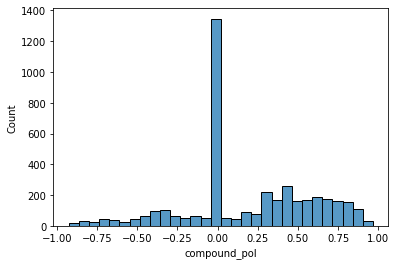

In [39]:
sns.histplot(data=df, x="compound_pol")

# VADER - Cleaning

In [40]:
df_clean = df

In [45]:
tw_text_list = df_clean["full_text"].tolist()

def remove_handles(text):
    r = re.findall("@[\w]*", text)
    for i in r:
        text = re.sub(i, "", text)
        
    return text

tw_text_list = list(map(remove_handles, tw_text_list))

def remove_links(text):
    r = re.findall("https?://[A-Za-z0-9./]*", text)
    for i in r:
        text = re.sub(i, "", text)
        
    return text

tw_text_list = list(map(remove_links, tw_text_list))

In [47]:
polarity_scores = list(map(sid.polarity_scores, tw_text_list))
compound = list(map(lambda x: x["compound"], polarity_scores))

In [48]:
df_clean["compound_pol"] = compound

<AxesSubplot:xlabel='compound_pol', ylabel='Count'>

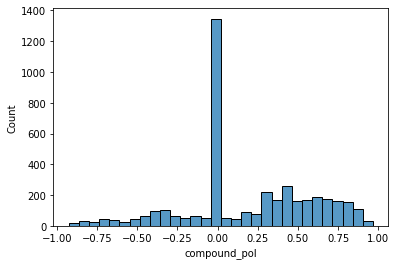

In [49]:
sns.histplot(data=df_clean, x="compound_pol")

In [50]:
df_clean.columns

Index(['index', 'tweet_id', 'created_at', 'in_reply_to_status', 'full_text',
       'verified', 'retweet_count', 'user_id', 'user_name',
       'user_followers_coubt', 'compound_pol'],
      dtype='object')

In [65]:
df_cbs = df_clean.groupby("user_name", as_index=False)["compound_pol"].mean()
df_cbs.sort_values(by="compound_pol", ascending=False)

,user_name,compound_pol
751,kinseyfineart,0.9678
712,headingreset,0.9377
769,mariarowen_1120,0.9245
572,WomenInNuclear,0.9078
52,Atomicrod,0.9062
...,...,...
650,corn_cap,-0.8689
813,patelpiping,-0.8706
449,SharpMediaNet,-0.8877
437,SZKwrites,-0.8931


In [78]:
#pd.to_datetime(pd.Series(['2022-02-27 19:15:57+00:00']), format="%m/%d/%Y")

strip_date = list(map(lambda x: x.split()[0], df_clean["created_at"].to_list()))
df_clean["stripdate"] = strip_date

In [82]:
df_clean.groupby("stripdate", as_index=False)["compound_pol"].mean()

,stripdate,compound_pol
0,2022-02-13,0.191110
1,2022-02-14,0.204342
2,2022-02-15,0.210986
3,2022-02-16,0.169869
4,2022-02-17,0.138976
5,2022-02-18,0.148210
6,2022-02-19,0.156225
7,2022-02-20,0.191318
8,2022-02-21,0.178904
9,2022-02-22,0.209989
